In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report
%matplotlib inline

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

sns.set(rc={'figure.figsize':(12,10)})


### 4. Loading the Raw Data


In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Logistic%20Regression%20Dummy%20Data%20v3.csv')
print(df.shape)
df.head()

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


### Exploratory Data Analysis

In [85]:
df.isnull().sum()


Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [86]:
df[df['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df = df.dropna(subset=['Employment History'], axis = 0)
df.isnull().sum()


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1001 non-null   object 
 1   Account History        1001 non-null   object 
 2   Reason for the Loan    1001 non-null   object 
 3   Loan Amount            1001 non-null   float64
 4   Account Savings        1001 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Stauts      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1001 non-null   float64
 10  Residence Status       1001 non-null   object 
 11  Job                    1001 non-null   object 
 12  Completed Other loan?  1001 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 117.3+ KB


In [89]:
## check for features with unique elements less than 10

for col in df:
    if df[col].nunique() < 10:
        print('The number of unique values of feature {} is {}'.format(col,df[col].unique()))

The number of unique values of feature Type of Account is ['No Data' 'Type A' 'Type B' 'Type C']
The number of unique values of feature Account History is ['critical' 'Average (known delays)' 'Good']
The number of unique values of feature Account Savings is ['0-200' 'No Data' '200-500' '1000+' '500-1000']
The number of unique values of feature Employment History is ['5-7 Years' '7+ Years' '2-5 Years' '0-2 Years' 'Unemployed']
The number of unique values of feature Individual Stauts is ['Male' 'Married' 'Female' 'Divorced' 'Female_']
The number of unique values of feature Other Loans is ['No' 'Yes']
The number of unique values of feature Security / Collateral is ['Property - Real Estate' 'Savings Account' 'Vehicle' 'No Security']
The number of unique values of feature Residence Status is ['House Owner' 'Renting' 'Free']
The number of unique values of feature Job is ['Services' 'Skilled Labor' 'Professional / Management' 'Not Employed']
The number of unique values of feature Completed Ot

In [90]:
for col in df:
    if df[col].nunique() > 10:
        print('The number of unique values of feature {} is {}'.format(col,df[col].nunique()))

The number of unique values of feature Loan Amount is 911
The number of unique values of feature Age is 57


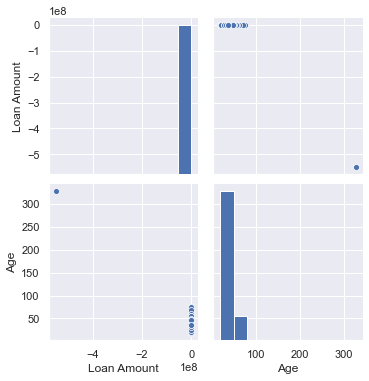

In [91]:
## visualize loan and age

sns.pairplot(df)

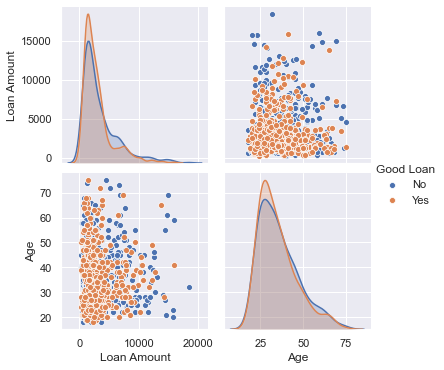

In [92]:
## remove the outlier to get clear visualization

df = df[df['Age'] < 100]

sns.pairplot(df, hue = 'Good Loan')

As we can see as the loan amount increases the acceptance of the loan is less likely. 

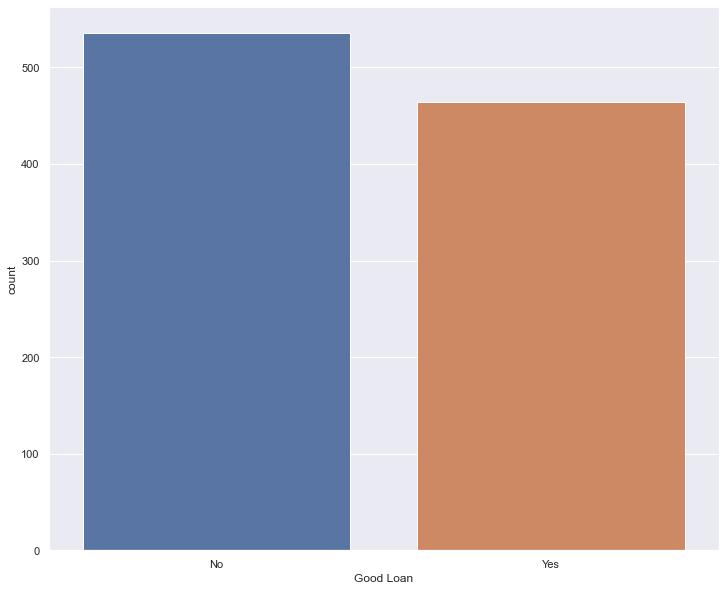

In [35]:
## check if the dataset is balanced or not

sns.countplot(df['Good Loan'])

In [93]:
#Balanced

## next check the relation of all cat features wrt to dependent variable

features = df.select_dtypes(exclude='number').drop('Good Loan', 1).columns

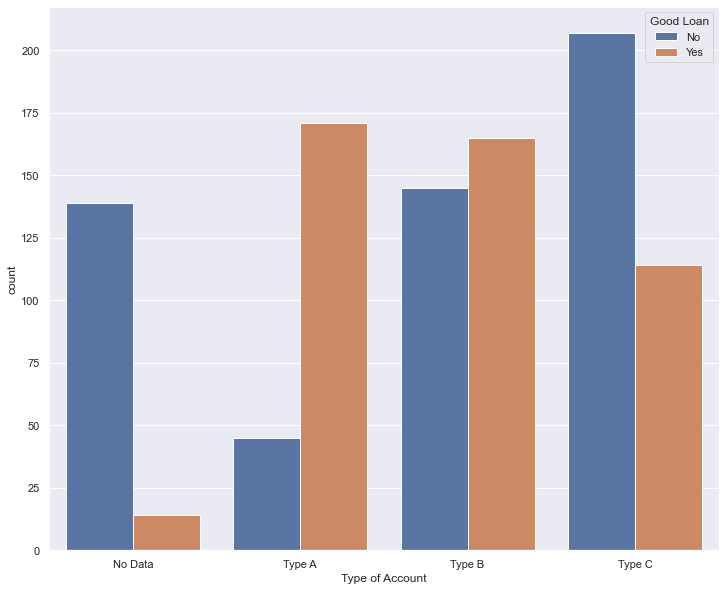

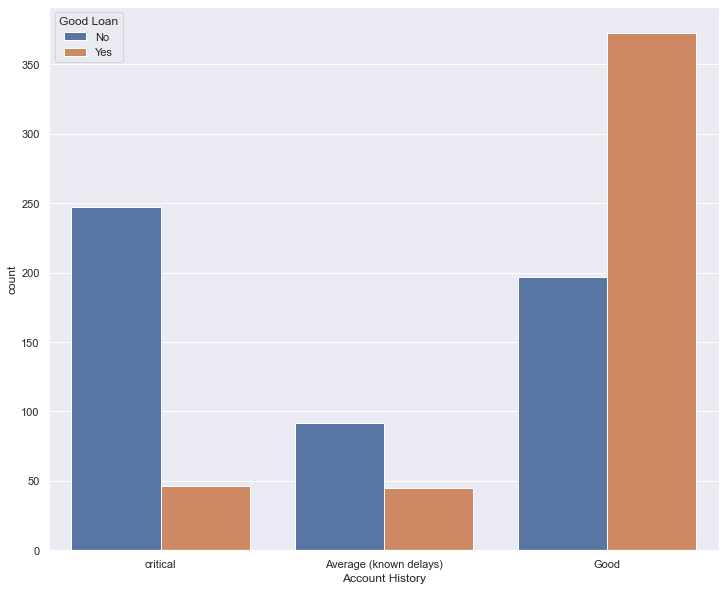

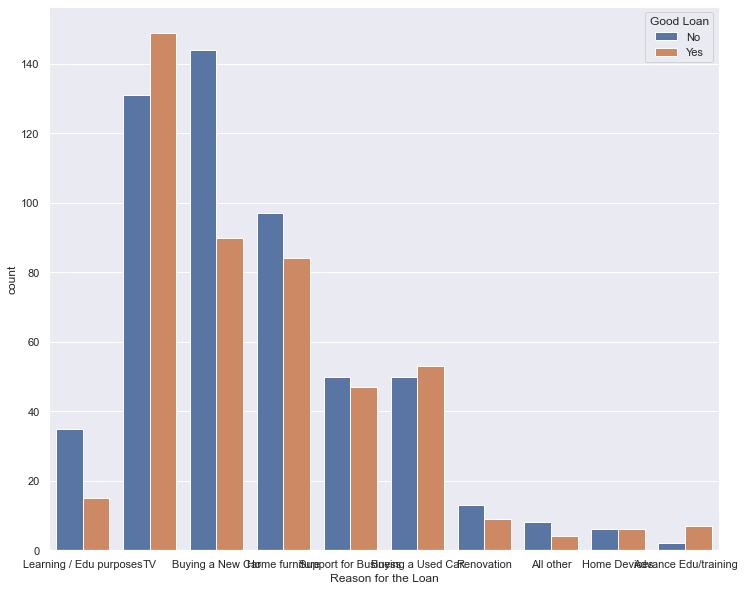

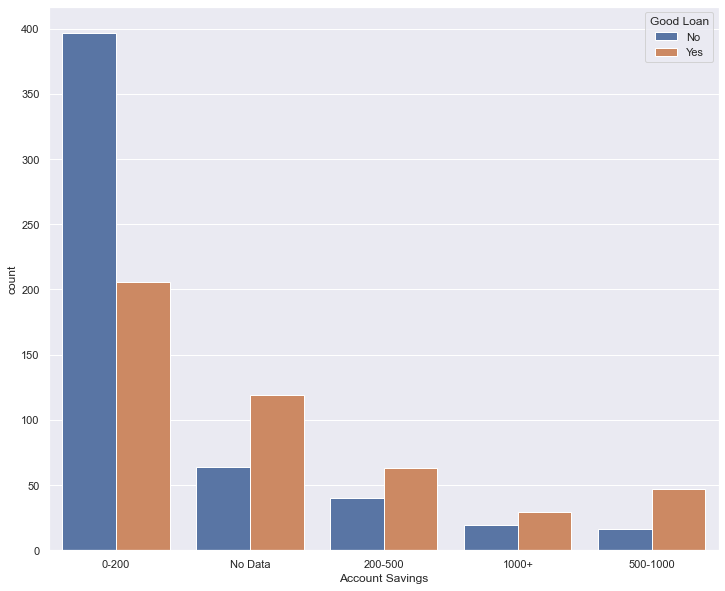

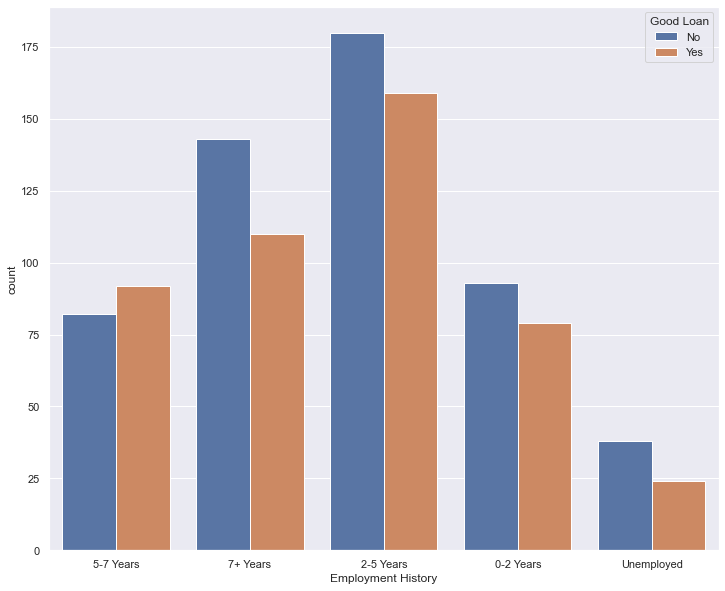

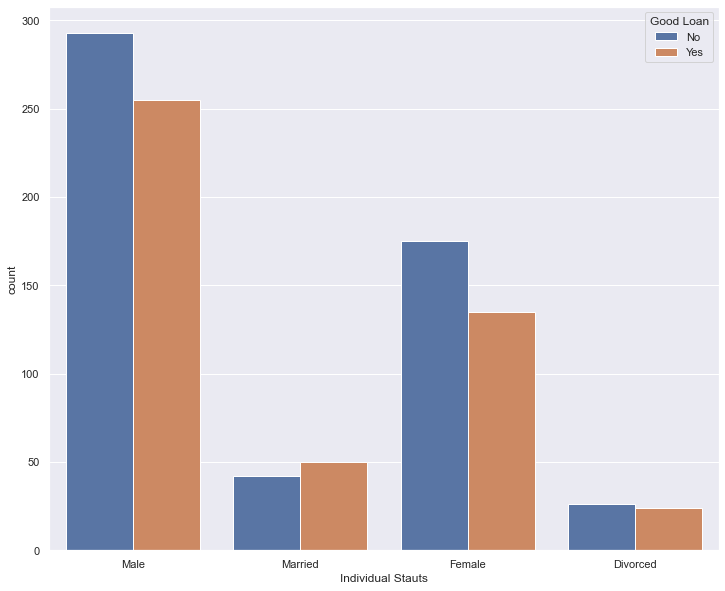

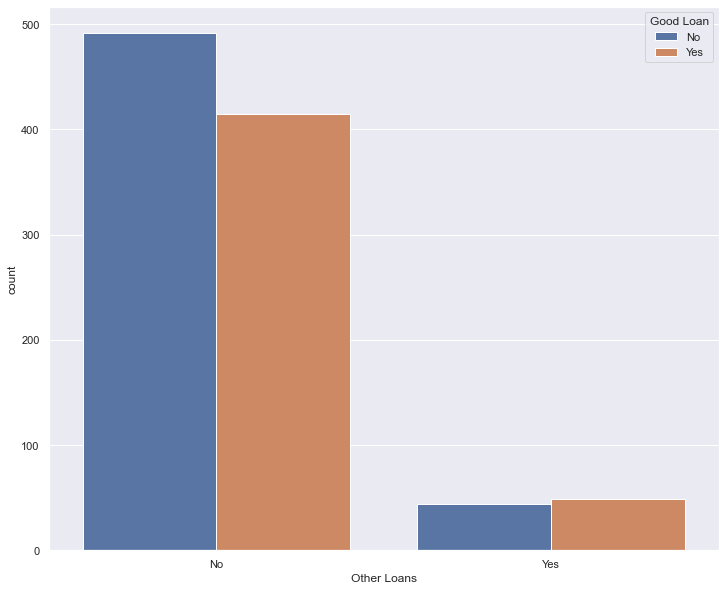

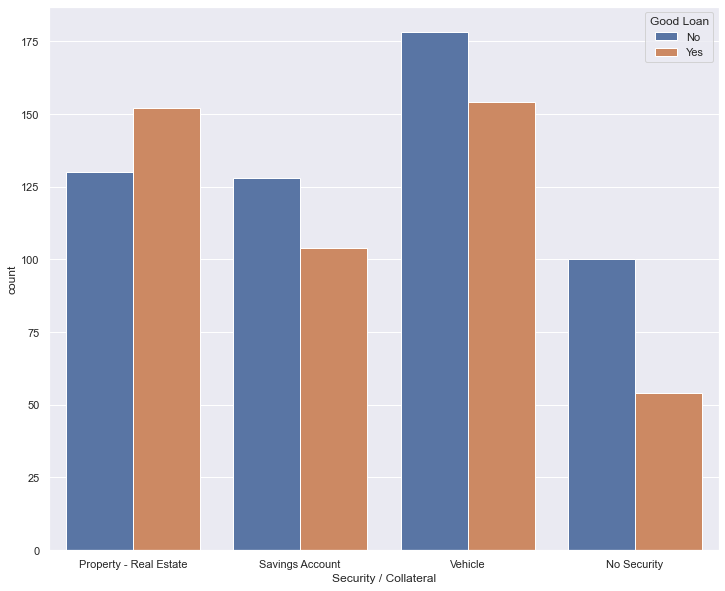

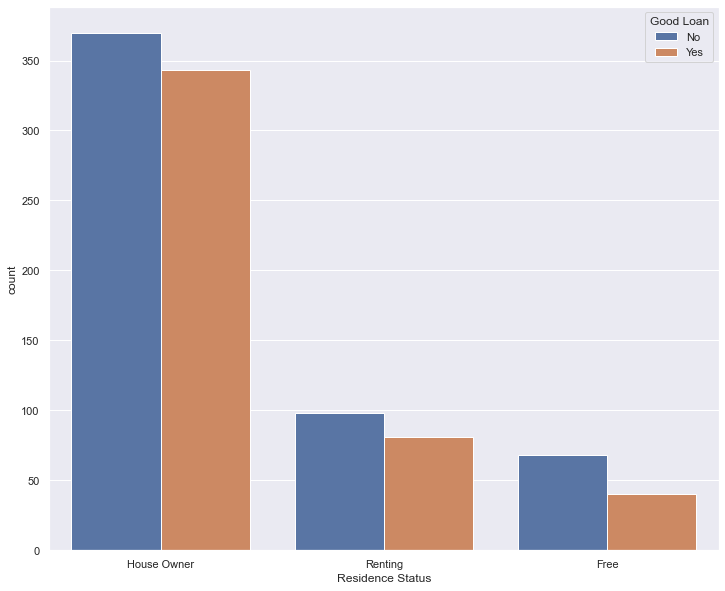

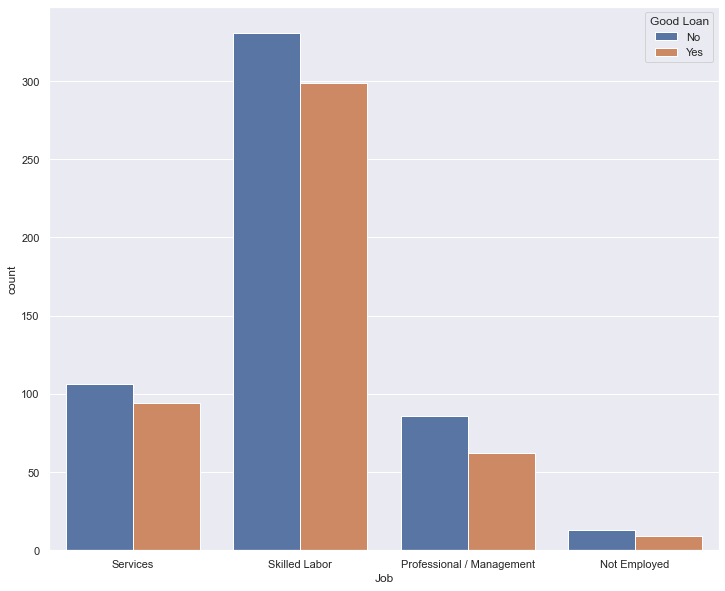

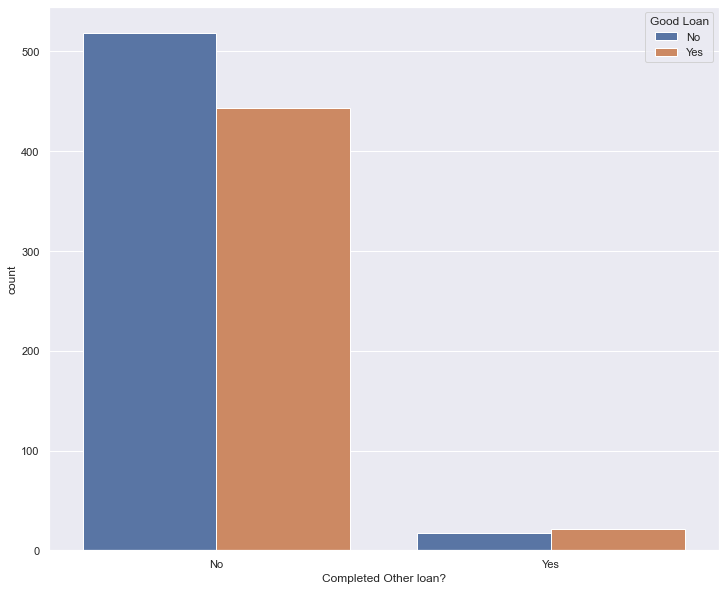

In [94]:
for feat in features:
    sns.countplot(df[feat], hue = df['Good Loan'])
    plt.show()

In [95]:
# since it is difficult to figure out which all features are important, we will go ahead with feature selection

# but before that we need to encode

df = pd.get_dummies(df,drop_first= True)

In [96]:
df = df.dropna()

In [97]:
df.head()

,Loan Amount,Age,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Good,Account History_critical,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,...,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_House Owner,Residence Status_Renting,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_Yes,Good Loan_Yes
0,2116.0,47.0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,2438.0,52.0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,2144.0,48.0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,2073.0,25.0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
4,1276.0,59.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


## FEATURE SELECTION

Steps of Running Feature Importance
->Split the data into X & y
->Run a Tree-based estimators (i.e. decision trees & random forests)
->Run Feature Importance

In [98]:
# Split the data into X & y

X = df.drop('Good Loan_Yes', axis = 1)
y = df['Good Loan_Yes']
print(X.shape)
print(y.shape)

(1000, 37)
(1000,)


In [99]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [100]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df.drop('Good Loan_Yes', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.11851091312453825
The feature importance for Age is : 0.11927203129113106
The feature importance for Type of Account_Type A is : 0.05246414016750868
The feature importance for Type of Account_Type B is : 0.029425472198296755
The feature importance for Type of Account_Type C is : 0.04028580809112482
The feature importance for Account History_Good is : 0.1858542283713255
The feature importance for Account History_critical is : 0.006182710969959951
The feature importance for Reason for the Loan_All other is : 0.002740052759790043
The feature importance for Reason for the Loan_Buying a New Car is : 0.00701690622691178
The feature importance for Reason for the Loan_Buying a Used Car is : 0.010037513584240801
The feature importance for Reason for the Loan_Home Devices is : 0.0
The feature importance for Reason for the Loan_Home furniture is : 0.008468038448578364
The feature importance for Reason for the Loan_Learning / Edu purposes is : 0.003508

In [101]:
# Creating a dataframe

imp_col = zip(fi_col, fi)
imp_col = pd.DataFrame(imp_col, columns=['Feature','Featrue_Imp']).sort_values('Featrue_Imp', ascending = False).reset_index()
imp_col = imp_col.iloc[:34,:]
imp_col

,index,Feature,Featrue_Imp
0,5,Account History_Good,0.185854
1,1,Age,0.119272
2,0,Loan Amount,0.118511
3,17,Account Savings_200-500,0.064745
4,16,Account Savings_1000+,0.056432
5,2,Type of Account_Type A,0.052464
6,18,Account Savings_500-1000,0.052213
7,19,Account Savings_No Data,0.048767
8,4,Type of Account_Type C,0.040286
9,3,Type of Account_Type B,0.029425


In [102]:
X = df[imp_col['Feature'].values]
y = df['Good Loan_Yes']

In [103]:
# Train test validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 34)
(200, 34)
(80, 34)
(720,)
(200,)
(80,)


In [104]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)


C:\Users\win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X

y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below


array([[1.097146, -0.003289, -0.000177, 1.220357, 1.165734, 1.005067,
        1.397135, 1.862589, -0.141326, 0.367938, 0.044349, -0.042178,
        0.282237, 0.539653, -0.182989, -0.248639, 0.662535, 0.308790,
        0.066082, 0.200871, -0.360356, 0.081832, -0.404838, -0.818517,
        -1.468085, 0.111709, 0.201321, -0.175718, 0.353139, -0.546784,
        -0.033089, 0.833018, -0.045452, 0.219083]])

In [106]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7583333333333333
The Testing Accuracy is:  0.775
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       387
           1       0.74      0.74      0.74       333

    accuracy                           0.76       720
   macro avg       0.76      0.76      0.76       720
weighted avg       0.76      0.76      0.76       720

